In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("employee_survey.csv")

# Show the first few rows
print(df.head())

   EmpID  Gender  Age MaritalStatus        JobLevel  Experience       Dept  \
0      6    Male   32       Married             Mid           7         IT   
1     11  Female   34       Married             Mid          12    Finance   
2     33  Female   23        Single  Intern/Fresher           1  Marketing   
3     20  Female   29       Married          Junior           6         IT   
4     28   Other   23        Single          Junior           1      Sales   

     EmpType  WLB  WorkEnv  ...  SleepHours       CommuteMode  \
0  Full-Time    1        1  ...         7.6               Car   
1  Full-Time    1        1  ...         7.9               Car   
2  Full-Time    2        4  ...         6.5         Motorbike   
3   Contract    2        2  ...         7.5  Public Transport   
4  Part-Time    3        1  ...         4.9               Car   

   CommuteDistance  NumCompanies TeamSize  NumReports  EduLevel  haveOT  \
0               20             3       12           0  Bachelor  

In [65]:
# Check data types of the columns
data_types = df.dtypes
print(data_types)

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
dtype: object


In [66]:
# Show summary statistics of the dataset
print(df.describe())

             EmpID          Age   Experience          WLB      WorkEnv  \
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean   1513.000000    35.741818     9.082645     3.061157     3.029091   
std     873.386608    10.191833     7.073344     1.447001     1.415317   
min       1.000000    22.000000     0.000000     1.000000     1.000000   
25%     757.000000    27.000000     3.000000     2.000000     2.000000   
50%    1513.000000    34.000000     8.000000     3.000000     3.000000   
75%    2269.000000    43.000000    14.000000     4.000000     4.000000   
max    3025.000000    60.000000    29.000000     5.000000     5.000000   

       PhysicalActivityHours     Workload       Stress   SleepHours  \
count            3025.000000  3025.000000  3025.000000  3025.000000   
mean                2.029620     2.966612     1.736529     7.005983   
std                 0.966014     1.401486     1.064242     1.002652   
min                 0.000000     1.000000     1.0

In [67]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64


In [68]:
# Handle missing values if necessary
df.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

In [69]:
# Ensure correct data types
df['JobLevel'] = df['JobLevel'].astype(str)  # Convert JobLevel to string

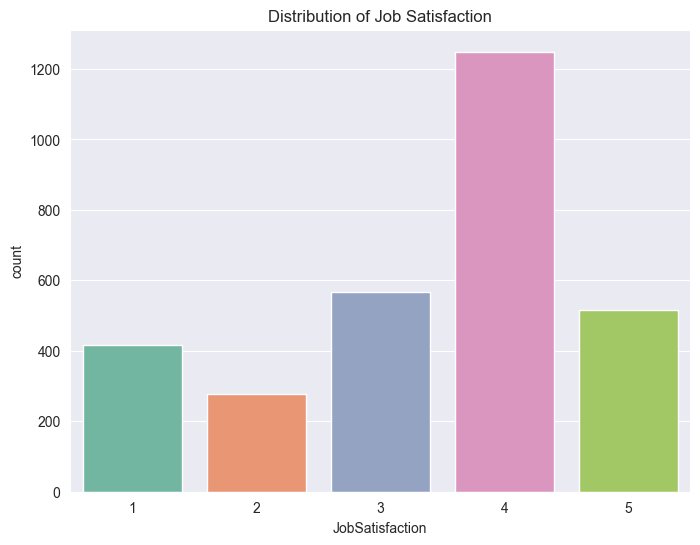

In [70]:
# Plot the distribution of Job Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSatisfaction', palette='Set2')
plt.title('Distribution of Job Satisfaction')
plt.show()

In [71]:
# Drop non-numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

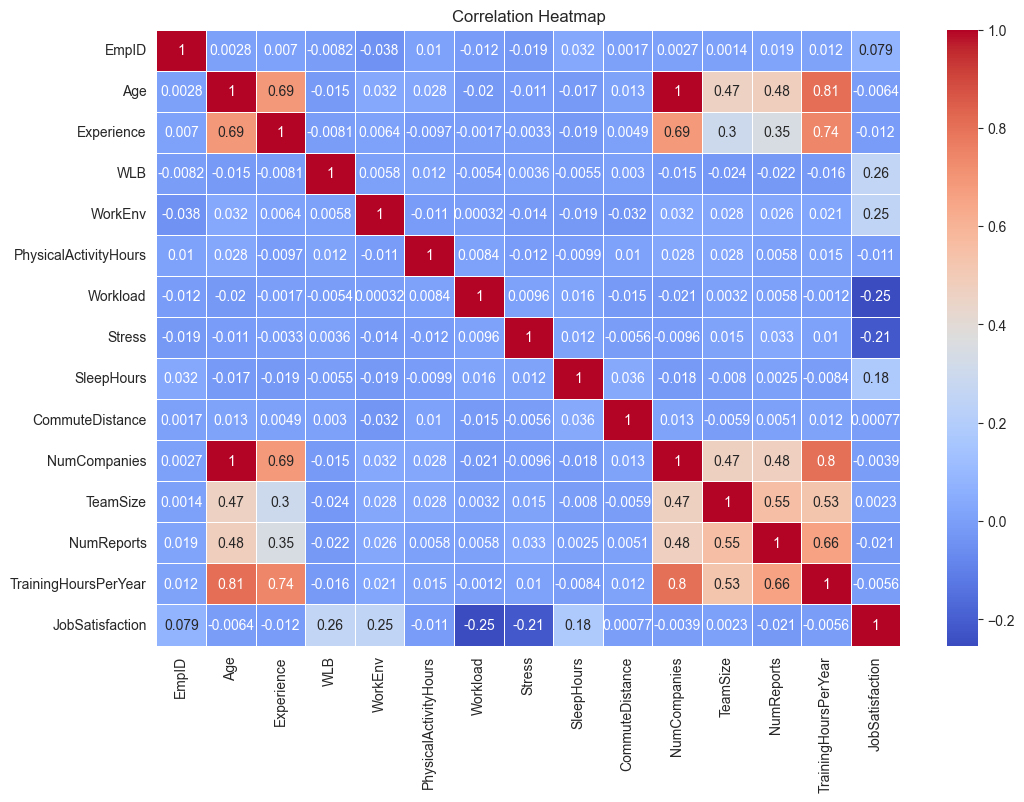

In [72]:
# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

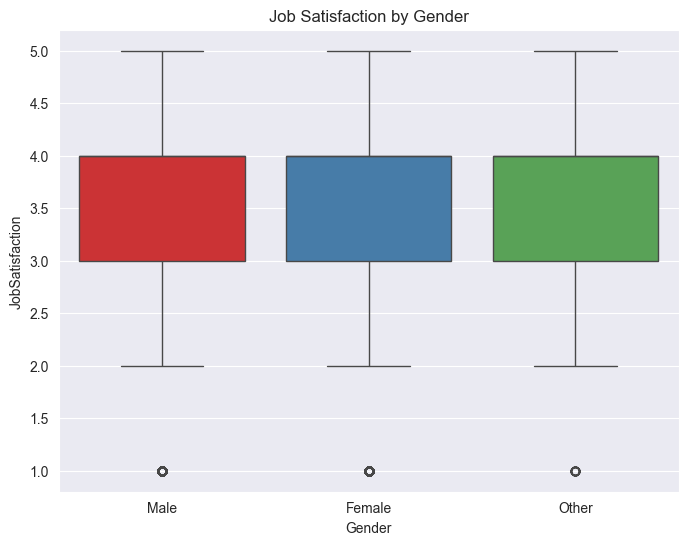

In [73]:
# Plot Job Satisfaction by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='JobSatisfaction', palette='Set1')
plt.title('Job Satisfaction by Gender')
plt.show()

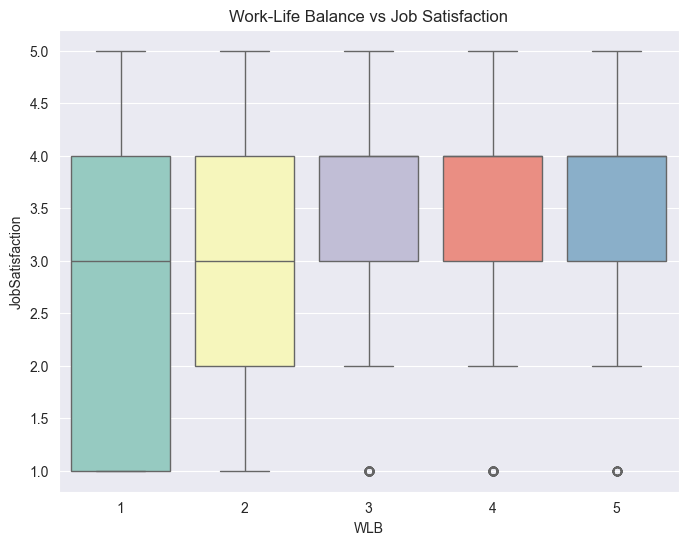

In [74]:
# Plot Work-Life Balance vs Job Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='WLB', y='JobSatisfaction', palette='Set3')
plt.title('Work-Life Balance vs Job Satisfaction')
plt.show()

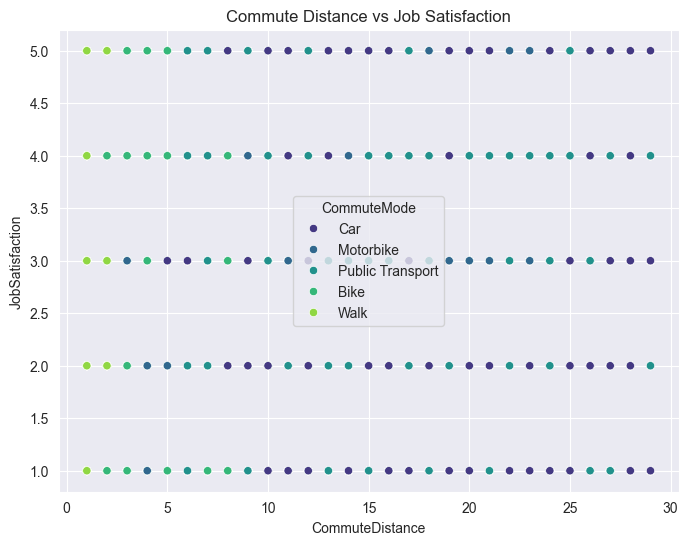

In [75]:
# Plot Commute Distance vs Job Satisfaction
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CommuteDistance', y='JobSatisfaction', hue='CommuteMode', palette='viridis')
plt.title('Commute Distance vs Job Satisfaction')
plt.show()

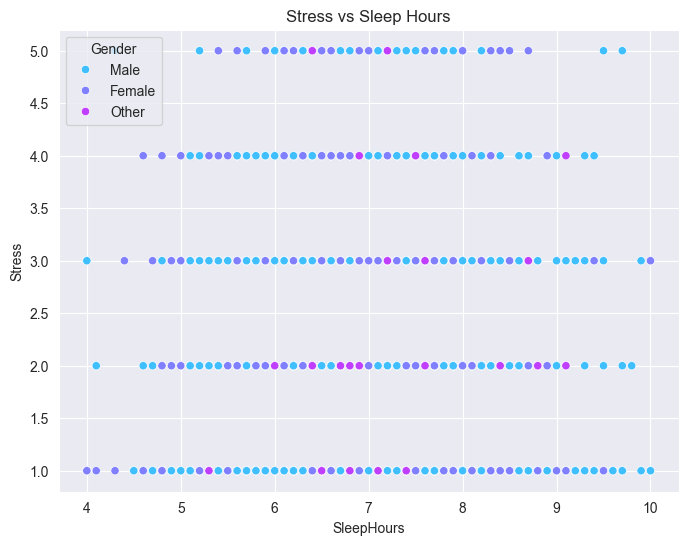

In [76]:
# Plot Stress vs Sleep Hours
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SleepHours', y='Stress', hue='Gender', palette='cool')
plt.title('Stress vs Sleep Hours')
plt.show()

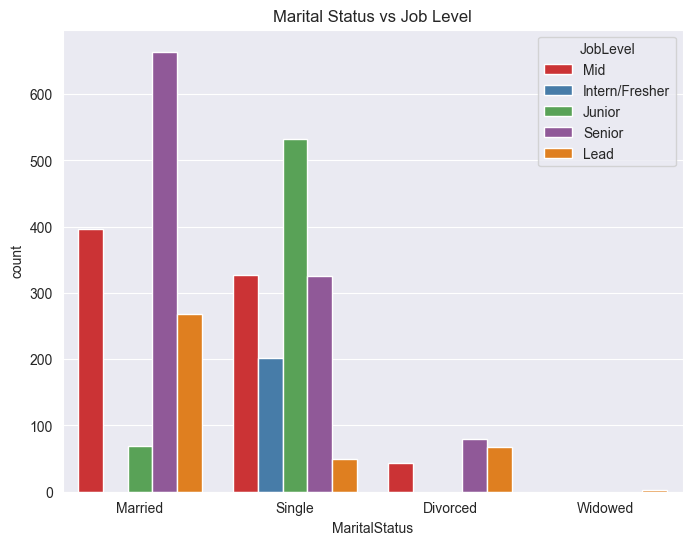

In [77]:
# Plot Marital Status vs Job Level
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MaritalStatus', hue='JobLevel', palette='Set1')
plt.title('Marital Status vs Job Level')
plt.show()

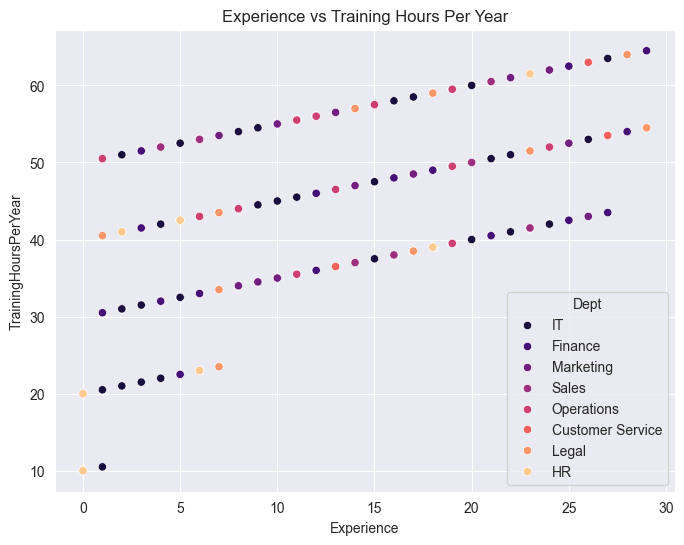

In [78]:
# Plot Experience vs Training Hours Per Year
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Experience', y='TrainingHoursPerYear', hue='Dept', palette='magma')
plt.title('Experience vs Training Hours Per Year')
plt.show()

In [79]:
# Identify categorical columns
categorical_cols = ['Gender', 'MaritalStatus', 'Dept', 'EmpType', 'CommuteMode', 'EduLevel', 'JobLevel']

In [80]:
# Separate features and target
X = df.drop(['EmpID', 'JobSatisfaction'], axis=1)  # Dropping non-useful and target columns
y = df['JobSatisfaction']

In [81]:
# Create a pipeline to apply one-hot encoding and train RandomForest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder='passthrough')

In [82]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [83]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in forest
    'classifier__max_depth': [None, 10, 20],      # Maximum depth of tree
    'classifier__min_samples_split': [2, 5],      # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2],       # Minimum samples required at each leaf node
}

In [84]:
# Build pipeline with preprocessing and classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [85]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

In [86]:
# Train the model with hyperparameter tuning on the training set
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'MaritalStatus',
                                                                          'Dept',
                                                                          'EmpType',
                                                                          'CommuteMode',
                                                                          'EduLevel',
                                                                          'JobLevel'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [87]:
# Get the best model
best_model = grid_search.best_estimator_

In [88]:
# Validate the model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 41.85%


In [89]:
# Test the model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 48.90%


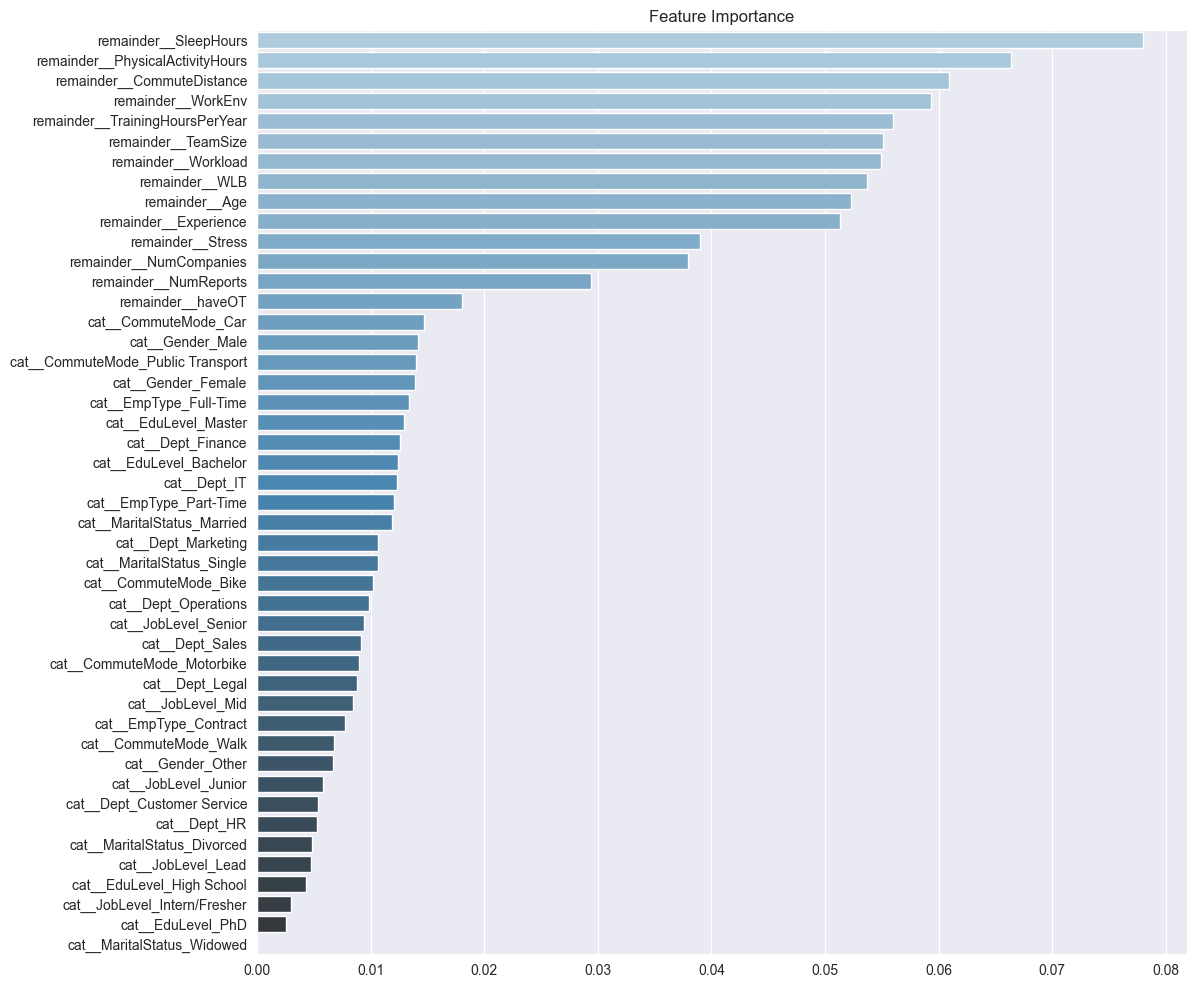

In [90]:
# Get feature importance from the best model (Random Forest)
rf_model = best_model.named_steps['classifier']
feature_importances = rf_model.feature_importances_
# Display the feature importances
encoded_columns = best_model.named_steps['preprocessor'].get_feature_names_out()
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 12))
plt.title("Feature Importance")
sns.barplot(x=feature_importances[indices], y=encoded_columns[indices], palette="Blues_d")
plt.show()

In [91]:
df.to_csv(r'D:\COE64-335\Final Pro\employee_survey_preprocessed.csv', index=False)

In [92]:
import joblib

# Save the best model (Random Forest in this case)
joblib.dump(best_model, 'FastAPI/best_random_forest_model.pkl')

# Save the preprocessor
joblib.dump(preprocessor, 'FastAPI/preprocessor.pkl')

['FastAPI/preprocessor.pkl']